<a href="https://colab.research.google.com/github/BouzoubaaNoura/Control_engineering-/blob/main/simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

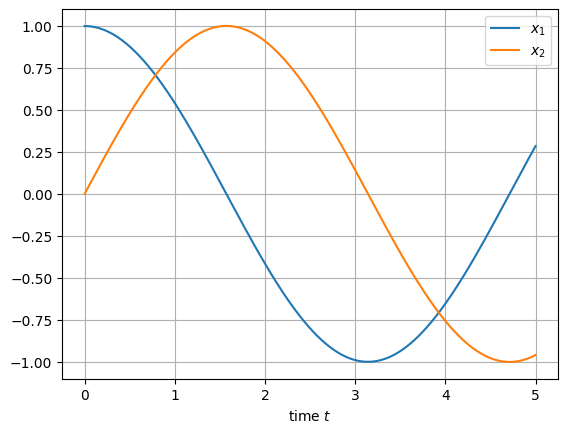

In [8]:
from numpy import *
from matplotlib.pyplot import *
from scipy import *
from numpy.linalg import *
from scipy.integrate import solve_ivp

def Q(f,xs,ys):
   X, Y = meshgrid(xs, ys)
   fx = vectorize(lambda x, y: f([x, y])[0])
   fy = vectorize(lambda x, y: f([x, y])[1])
   return X, Y, fx(X, Y), fy(X, Y)

def basic_solve_ivp(f, t_span, y0, dt=1e-3):
    t0, t1 = t_span
    ts, xs = [t0], [y0]
    while ts[-1] < t1:
        t, x = ts[-1], xs[-1]
        t_next, x_next = t + dt, x + dt * f(x)
        ts.append(t_next); xs.append(x_next)
    return (array(ts), array(xs).T)

def f(x):
   x1,x2 =x
   return array([-x2,x1])
t0,t1=array([0,5])
y0=array([1,0])
t,x=basic_solve_ivp(f,(t0,t1),y0)
figure()
plot(t, x[0], label="$x_1$")
plot(t, x[1], label="$x_2$")
grid(True)
xlabel("time $t$")
legend()



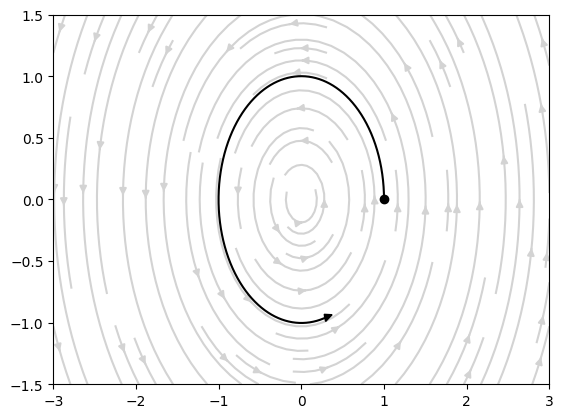

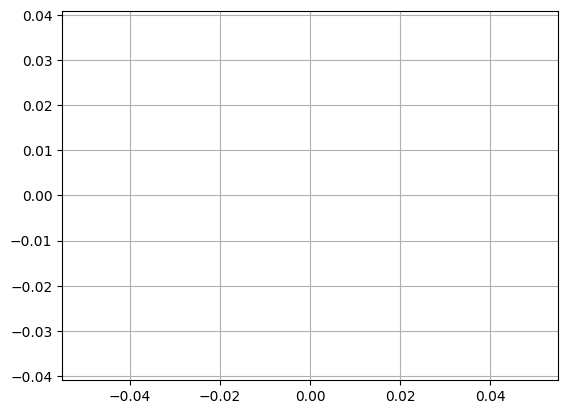

In [13]:
def plot_trajectory_in_state_space(x):
    x1, x2 = x[0], x[1]
    plot(x1, x2, "k");
    plot(x1[0], x2[0], "ko")
    dx1, dx2 = x1[-1] - x1[-2], x2[-1] - x2[-2]
    arrow(x1[-1], x2[-1], dx1, dx2,width=0.02, color="k", zorder=10)
figure()
xs = linspace(-3.0, 3.0, 50)
ys = linspace(-1.5, 1.5, 50)
streamplot(*Q(f, xs, ys), color="lightgrey")
plot_trajectory_in_state_space(x)
axis("equal"); grid(True)

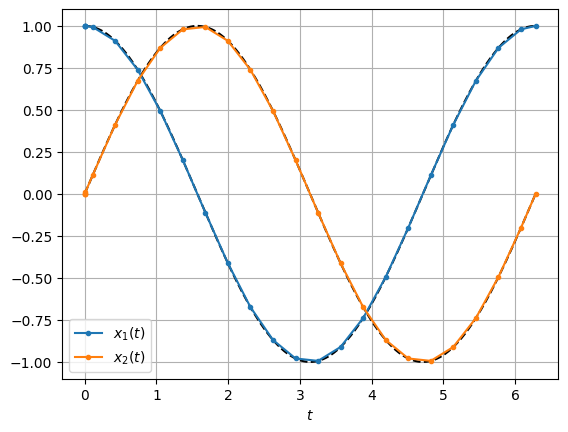

In [16]:
options = {
    # at least 20 data points
    "max_step": 2*pi/20,
    # standard absolute tolerance
    "atol"    : 1e-6,
    # very large relative tolerance
    "rtol"    : 1e9
}
def fun(t, y):
    x1, x2 = y
    return array([-x2, x1])
t_span = [0.0, 2*pi]
y0 = [1.0, 0.0]
result = solve_ivp(fun=fun, t_span=t_span, y0=y0, **options )
rt = result["t"]
x1 = result["y"][0]
x2 = result["y"][1]
figure()
t = linspace(0, 2*pi, 1000)
plot(t, cos(t), "k--")
plot(t, sin(t), "k--")
plot(rt, x1, ".-", label="$x_1(t)$")
plot(rt, x2, ".-", label="$x_2(t)$")
xlabel("$t$"); grid(); legend()

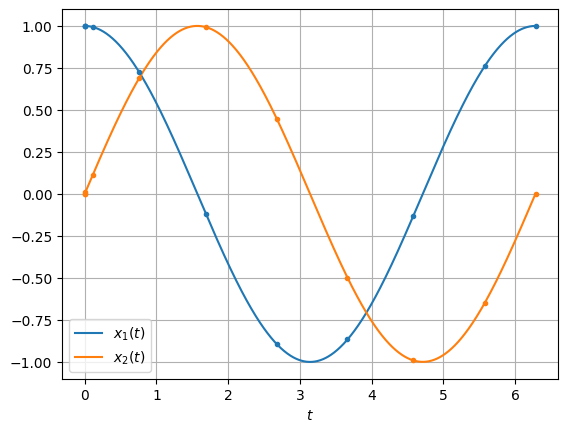

In [18]:
options = {
    "dense_output": True
}
def fun(t, y):
    x1, x2 = y
    return array([-x2, x1])
t_span = [0.0, 2*pi]
y0 = [1.0, 0.0]
result = solve_ivp(fun=fun, t_span=t_span, y0=y0, **options )
rt = result["t"]
x1 = result["y"][0]
x2 = result["y"][1]
sol = result["sol"]


figure()
t = linspace(0, 2*pi, 1000)
plot(t, sol(t)[0], "-", label="$x_1(t)$")
plot(t, sol(t)[1], "-", label="$x_2(t)$")
plot(rt, x1, ".", color="C0")
plot(rt, x2, ".", color="C1")
xlabel("$t$"); grid(); legend()